In [3]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

In [4]:
df=pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\Machine_learning\svm\stroke.csv")

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.drop(columns=['id'],inplace=True)

In [7]:
df.shape
df.dtypes
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

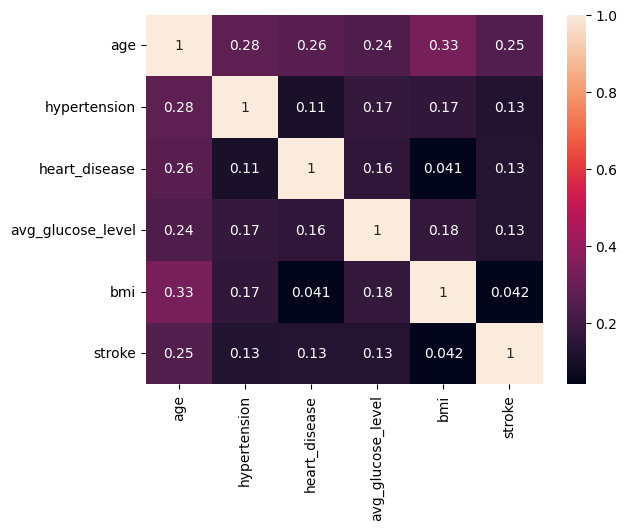

In [8]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

data cleaning


In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [11]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df["bmi"].value_counts()

bmi
28.1    230
28.7     41
28.4     38
26.7     37
27.6     37
       ... 
48.7      1
49.2      1
51.0      1
49.4      1
14.9      1
Name: count, Length: 418, dtype: int64

In [14]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

outlier detection

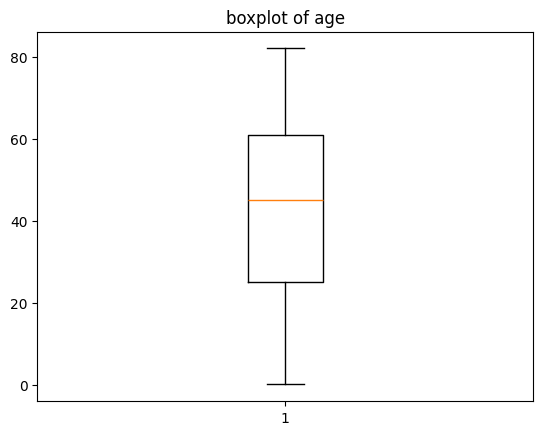

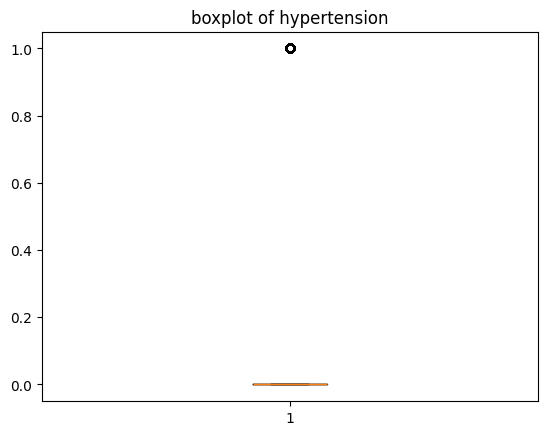

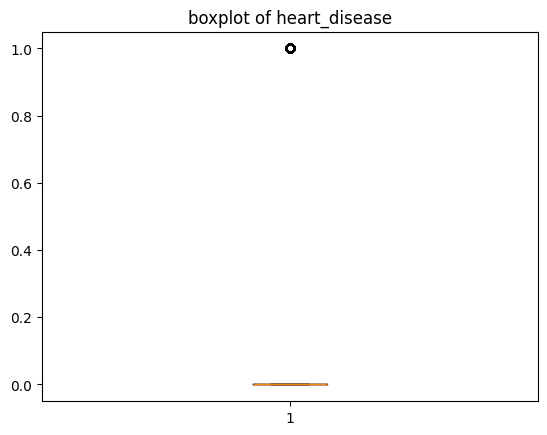

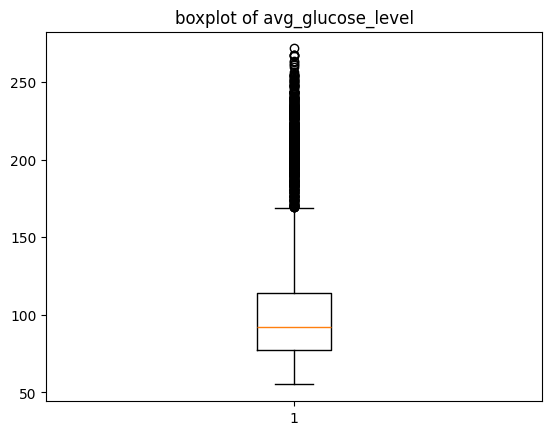

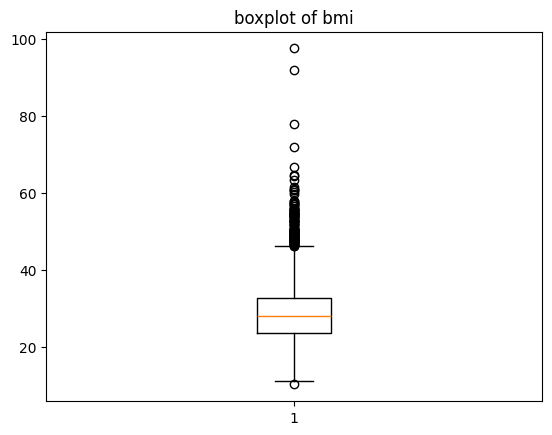

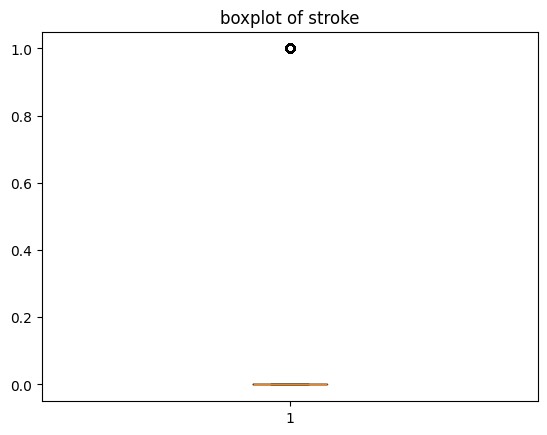

In [15]:
for col in df:
    if df[col].dtype=='int64' or df[col].dtype=='float':
        plt.title(f"boxplot of {col}")
        plt.boxplot(df[col])
        plt.show()

In [16]:
df[df['bmi']>50]['stroke'].value_counts()

stroke
0    78
1     1
Name: count, dtype: int64

removing cxritical outlier   columns

In [17]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
minimum=q1-1.5*iqr
maximum=q3+1.5*iqr
df=df[(df['bmi']>=minimum)&(df['bmi']<=maximum)]

In [18]:
df['stroke'].value_counts()

stroke
0    4738
1     246
Name: count, dtype: int64

In [19]:
for i in df:
    if df[i].dtype=='object':
        print(df[i].value_counts())

gender
Female    2895
Male      2088
Other        1
Name: count, dtype: int64
ever_married
Yes    3255
No     1729
Name: count, dtype: int64
work_type
Private          2836
Self-employed     801
children          686
Govt_job          639
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2538
Rural    2446
Name: count, dtype: int64
smoking_status
never smoked       1836
Unknown            1515
formerly smoked     862
smokes              771
Name: count, dtype: int64


In [20]:
df=df[df['gender']!='Other']

In [21]:
df.reset_index(drop=True,inplace=True)

In [22]:
df['gender'].value_counts()

gender
Female    2895
Male      2088
Name: count, dtype: int64

In [23]:
df[df['smoking_status']=='Unknown']['stroke'].value_counts()

stroke
0    1468
1      47
Name: count, dtype: int64

In [24]:
df[df['smoking_status']=='Unknown'][df['stroke']==1].replace('Unknown','smokes',inplace=True)

C:\Users\akhil\AppData\Local\Temp\ipykernel_5132\103154405.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoking_status']=='Unknown'][df['stroke']==1].replace('Unknown','smokes',inplace=True)


In [25]:
df[df['smoking_status']=='Unknown'][df['stroke']==1]

C:\Users\akhil\AppData\Local\Temp\ipykernel_5132\1544607256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoking_status']=='Unknown'][df['stroke']==1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.00,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.00,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,28.1,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,28.1,Unknown,1
22,Male,82.00,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
26,Male,58.00,0,0,Yes,Private,Rural,189.84,28.1,Unknown,1
30,Male,42.00,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
37,Male,58.00,0,0,No,Private,Rural,92.62,32.0,Unknown,1
45,Female,75.00,0,1,No,Self-employed,Urban,109.78,28.1,Unknown,1
49,Female,76.00,0,0,No,Private,Urban,89.96,28.1,Unknown,1


In [26]:
df.loc[(df['smoking_status']=='Unknown')&(df['stroke']==1),'smoking_status']='smokes'

In [27]:
df[df['smoking_status']=='Unknown'][df['stroke']==1]

C:\Users\akhil\AppData\Local\Temp\ipykernel_5132\1544607256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoking_status']=='Unknown'][df['stroke']==1]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [28]:
df.loc[(df['smoking_status']=='Unknown')&(df['stroke']==0),'smoking_status']='formerly smoked'

In [29]:
df[df['smoking_status']=='unknown'][df['stroke']==0]

C:\Users\akhil\AppData\Local\Temp\ipykernel_5132\3587222343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoking_status']=='unknown'][df['stroke']==0]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [30]:
df['smoking_status'].value_counts()

smoking_status
formerly smoked    2329
never smoked       1836
smokes              818
Name: count, dtype: int64

19/03/25

In [31]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

In [32]:
le=LabelEncoder()
le.fit_transform(df['smoking_status'])


array([0, 1, 1, ..., 1, 0, 0])

In [33]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [34]:
label=[]
for i in df:
    if df[i].nunique()==2 and df[i].dtype=='object':
        label.append(i)

In [35]:
label

['gender', 'ever_married', 'Residence_type']

In [36]:
dict1={}
for i in label:
    dict1[i]=LabelEncoder()
    df[i]=dict1[i].fit_transform(df[i])

In [37]:
dict1['gender'].transform(['Male'])

array([1])

In [38]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4978,0,80.0,1,0,1,Private,1,83.75,28.1,never smoked,0
4979,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4980,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
4981,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [39]:
df['work_type'].unique()
df_new=df.copy()
df=pd.get_dummies(df,columns=['work_type'],drop_first=True,dtype=int)

In [40]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,never smoked,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,0,80.0,1,0,1,1,83.75,28.1,never smoked,0,0,1,0,0
4979,0,81.0,0,0,1,1,125.20,40.0,never smoked,0,0,0,1,0
4980,0,35.0,0,0,1,0,82.99,30.6,never smoked,0,0,0,1,0
4981,1,51.0,0,0,1,0,166.29,25.6,formerly smoked,0,0,1,0,0


In [41]:
df_new
onehot=OneHotEncoder(sparse_output=False,drop='first')
res=onehot.fit_transform(df_new[['work_type']])

In [42]:
onehot.get_feature_names_out()

array(['work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children'], dtype=object)

In [43]:
res=pd.DataFrame(res,columns=onehot.get_feature_names_out())

In [44]:
df_new.drop(columns=['work_type'],inplace=True)

In [45]:
df=df_new.join(res)

In [46]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.1,never smoked,1,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1,0.0,1.0,0.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1,0.0,1.0,0.0,0.0
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,0,80.0,1,0,1,1,83.75,28.1,never smoked,0,0.0,1.0,0.0,0.0
4979,0,81.0,0,0,1,1,125.20,40.0,never smoked,0,0.0,0.0,1.0,0.0
4980,0,35.0,0,0,1,0,82.99,30.6,never smoked,0,0.0,0.0,1.0,0.0
4981,1,51.0,0,0,1,0,166.29,25.6,formerly smoked,0,0.0,1.0,0.0,0.0


In [47]:
onehot.transform([["Govt_job"]])

c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0.]])

20/03/25

In [48]:
ordinal=OrdinalEncoder(categories=[["never smoked","formerly smoked","smokes"]])
df["smoking_status"]=ordinal.fit_transform(df[["smoking_status"]])

In [49]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1.0,1,0.0,1.0,0.0,0.0
1,0,61.0,0,0,1,0,202.21,28.1,0.0,1,0.0,0.0,1.0,0.0
2,1,80.0,0,1,1,0,105.92,32.5,0.0,1,0.0,1.0,0.0,0.0
3,0,49.0,0,0,1,1,171.23,34.4,2.0,1,0.0,1.0,0.0,0.0
4,0,79.0,1,0,1,0,174.12,24.0,0.0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,0,80.0,1,0,1,1,83.75,28.1,0.0,0,0.0,1.0,0.0,0.0
4979,0,81.0,0,0,1,1,125.20,40.0,0.0,0,0.0,0.0,1.0,0.0
4980,0,35.0,0,0,1,0,82.99,30.6,0.0,0,0.0,0.0,1.0,0.0
4981,1,51.0,0,0,1,0,166.29,25.6,1.0,0,0.0,1.0,0.0,0.0


In [50]:
ordinal.inverse_transform([[0]])

array([['never smoked']], dtype=object)

scalling

In [51]:
x=df.drop(columns=["stroke"])
y=df['stroke']

In [52]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)


train test split

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)


model selection and training

KNeighborsClassifier() 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1410
           1       0.33      0.02      0.04        85

    accuracy                           0.94      1495
   macro avg       0.64      0.51      0.51      1495
weighted avg       0.91      0.94      0.92      1495

0.9418060200668896


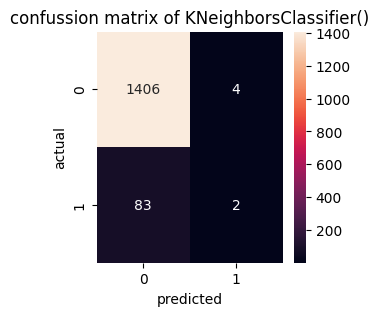



SVC() 
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1410
           1       0.00      0.00      0.00        85

    accuracy                           0.94      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.89      0.94      0.92      1495

0.9431438127090301


c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

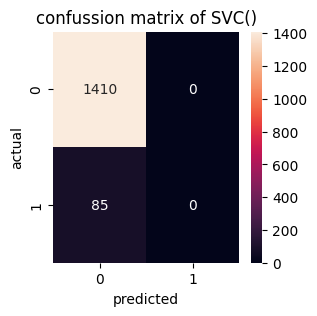

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
models=[KNeighborsClassifier(),SVC()]
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i,"\n------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
    plt.title(f"confussion matrix of {i}")
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()
    print("\n")



In [55]:
df['stroke'].value_counts()

stroke
0    4737
1     246
Name: count, dtype: int64

TO Balance the Dataset we do sampling

In [56]:
#under sampling
# 
#over sampling

under sampling

In [57]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler=RandomUnderSampler()
x_under,y_under=under_sampler.fit_resample(x_scaled,y)

In [58]:
y_under.value_counts()
x_under.shape

(492, 13)

In [59]:
from imblearn.over_sampling import RandomOverSampler
over_sampler=RandomOverSampler()
x_over,y_over=over_sampler.fit_resample(x_scaled,y)

In [60]:
y_over.value_counts()

stroke
1    4737
0    4737
Name: count, dtype: int64

smote

In [61]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_over_s,y_over_s=smote.fit_resample(x_scaled,y)

In [62]:
pd.DataFrame(x_over_s).duplicated().sum()

0

In [63]:
y_over_s.value_counts()

stroke
1    4737
0    4737
Name: count, dtype: int64